### sklearn.datasets.make_classification
sklearn.datasets.make_classification(_n_samples=100_, _n_features=20_, _*_, _n_informative=2_, _n_redundant=2_, _n_repeated=0_, _n_classes=2_, _n_clusters_per_class=2_, _weights=None_, _flip_y=0.01_, _class_sep=1.0_, _hypercube=True_, _shift=0.0_, _scale=1.0_, _shuffle=True_, _random_state=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/7b13a8f12/sklearn/datasets/_samples_generator.py#L42)[¶](https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification "Permalink to this definition")
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1) about vertices of an  `n_informative`-dimensional hypercube with sides of length  `2*class_sep`  and assigns an equal number of clusters to each class. It introduces interdependence between these features and adds various types of further noise to the data.

Without shuffling,  `X`  horizontally stacks features in the following order: the primary  `n_informative`  features, followed by  `n_redundant`  linear combinations of the informative features, followed by  `n_repeated`  duplicates, drawn randomly with replacement from the informative and redundant features. The remaining features are filled with random noise. Thus, without shuffling, all useful features are contained in the columns  `X[:,  :n_informative  +  n_redundant  +  n_repeated]`.

Read more in the  [User Guide](https://scikit-learn.org/dev/datasets/sample_generators.html#sample-generators).

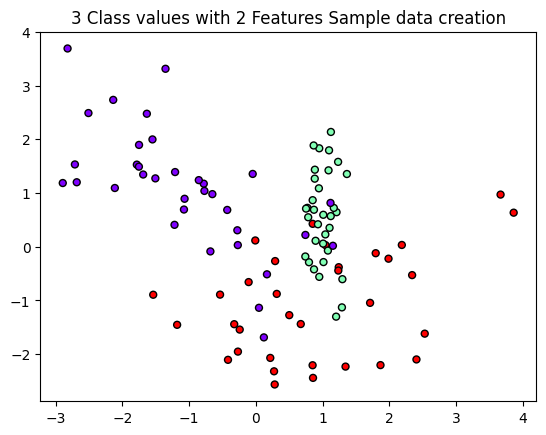

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [16]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\seopa\AppData\Local\Temp\ipykernel_39096\180762386.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
C:\Users\seopa\AppData\Local\Temp\ipykernel_39096\180762386.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


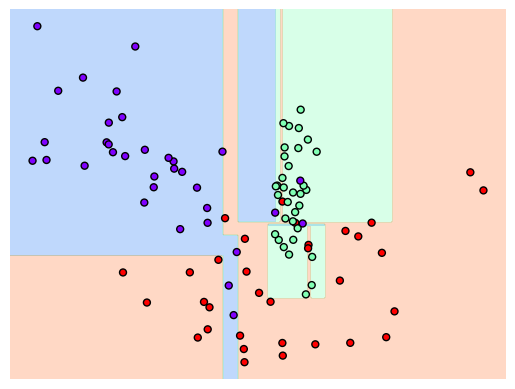

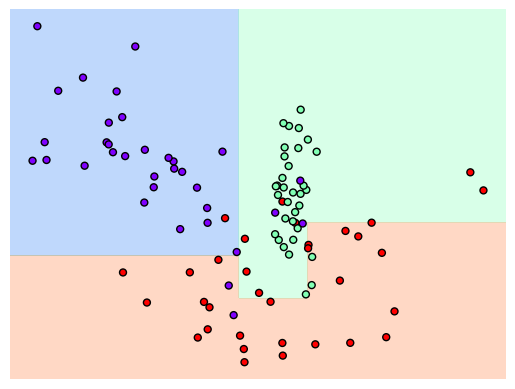

In [18]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)